<a href="https://colab.research.google.com/github/ashutoshsinha25/pepcoding_FJP_DS/blob/main/Linear%20Regression/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression**

* Linear Regression equation :- y = mx + c
* Here m --> weight , c --> bais , y --> dependent variable , x --> independent variable
* For optimizing the algorithm, we would be using ` Gradient Descent`
* Wnew = Wold - alpha\*dW and Bnew = Bold - alpha\*db

In [32]:
# import numpy 
import numpy as np

In [59]:
# linear regression class

class linear_regression():

  def __init__(self, learning_rate, iteration):
    self.learning_rate = learning_rate
    self.iteration = iteration

  def fit(self, x, y):
    # no of traning examples, no of features
    self.m , self.n = x.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.x = x
    self.y = y

    # gradient descent
    for i in range(self.iteration):
      self.update_weights()

  # updating weights using gradient descent
  def update_weights(self ):
    y_pred = self.predict(self.x)

    # calculate the gradient
    dw = - ( 2 * (self.x.T).dot(self.y - y_pred)) / self.m
    db = - ( 2 * np.sum(self.y - y_pred) / self.m)

    # updating the weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  # prediction function
  def predict(self, x):
    return x.dot(self.w) + self.b

In [34]:
# import other linraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/Pepcoders/Data-Science-January/main/Linear%20Regression/salary_data.csv')

In [36]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [37]:
df.shape

(30, 2)

In [38]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [39]:
df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [40]:
# creating dependent and independent variables
X = df['YearsExperience']
Y = df['Salary']

In [41]:
print(X)

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64


In [42]:
X_train , X_test , y_train , y_test = train_test_split(X , Y, test_size = 0.33 , random_state = 2)

In [43]:
# model 
model = linear_regression(learning_rate = 0.01 , iteration = 1000)


In [52]:
# np.expand_dims(X_train , axis = -1).shape  , we need to expand the dimension to make it unpack in the code

(20, 1)

In [53]:
# fitting the mode
model.fit(np.expand_dims(X_train , axis = -1) , y_train)

In [54]:
# print the weights and biases 
print('weight :' , model.w[0])
print('bias :', model.b )

weight : 9580.301196603597
bias : 23226.38946603212


In [63]:
# prdiction
y_pred = model.predict(np.expand_dims(X_test , axis = -1))

In [64]:
y_pred

array([ 35680.78102162,  33764.7207823 ,  66337.74485075,  58673.50389347,
        91246.52796192,  80708.19664565, 101784.85927818,  51967.29305584,
        42386.99185924,  88372.43760294])

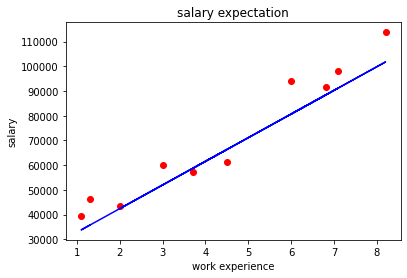

In [65]:
# visualization of the model
plt.scatter(X_test , y_test , color = 'r')
plt.plot(X_test , y_pred , color = 'b')
plt.xlabel('work experience')
plt.ylabel('salary')
plt.title('salary expectation')
plt.show()

## Linear Regression with sklearn

In [66]:
from sklearn.linear_model import LinearRegression

In [68]:
model_sk = LinearRegression()

In [71]:
model_sk.fit(np.expand_dims(X_train , axis = -1),y_train)

LinearRegression()

In [75]:
model_sk.score(np.expand_dims(X_test , axis = -1),y_test)

0.9041801644162628

In [78]:
model_sk.intercept_ , model_sk.coef_

(23707.81324657549, array([9512.94498763]))